In [181]:
import wave
import struct
import numpy as np
import librosa

In [182]:
def loadwav(filename):
    waveFile = wave.open(filename,'rb')
    nchannel = waveFile.getnchannels()
    length = waveFile.getnframes()
    nBytes = nchannel * length
    format = "<" +str(nBytes) + "h"

    waveData = waveFile.readframes(length)
    data_a = struct.unpack(format,waveData)

    waveFile.close()

    wave_channel1 =list(data_a)
    y = np.array(wave_channel1,np.float32)
    sr = waveFile.getframerate()
    
    return y,sr

In [183]:
filename = '../data/wav/s10_anger_M_a17.wav'

y, sr = loadwav(filename)

In [184]:
print (len(y))
print(sr)

57479
16000


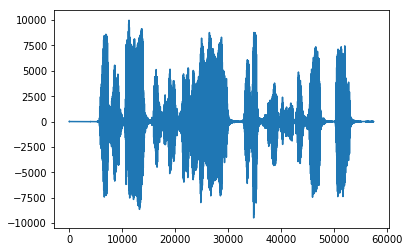

In [185]:
import matplotlib.pyplot as plt

plt.plot(y)
plt.show()

- Normalization

In [186]:
import math
y = y / math.pow(2,16)

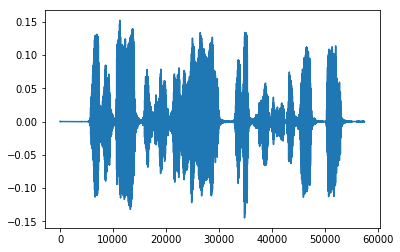

In [187]:
plt.plot(y)
plt.show()

In [188]:
n_mfcc = 13                #MFCC 계수 크기
time_step = 46

In [189]:
def MFCC(y,sr,window_size,n_mfcc):
    S = librosa.feature.melspectrogram(y=y, hop_length = window_size+1,n_mels = 512, sr=sr)
    log_S = librosa.amplitude_to_db(S, ref = np.max)
    mfcc = librosa.feature.mfcc(S=log_S,sr=sr, n_mfcc=n_mfcc)
    
    return mfcc

In [190]:
sr =16000

y_sub = y[10000:10000+window_size]

mfcc = MFCC(y_sub, sr, window_size, 13)

print(mfcc)

[[-1541.0951151 ]
 [  288.12878325]
 [  154.37787776]
 [  112.18556309]
 [   82.69385338]
 [   10.43493442]
 [  -50.96152818]
 [  -46.34659113]
 [  -12.04362497]
 [  -12.26368722]
 [  -24.75678784]
 [  -29.59152035]
 [  -42.74141035]]


In [211]:
window_size = 500
num = int(len(y)/window_size)
Training_vector=[]
uttr=[]

for i in range(94):
    start = 10000 + window_size*i
    end = start + window_size
    y_sub = y[start : end]
    a=MFCC(y_sub, sr, window_size, 13)
    a = a.tolist()
    Training_vector.append(a) 
   
   # print(mfcc)
print(uttr)

[]


In [225]:
print(len(Training_vector))

94


In [229]:
tx = [] 

for i in range(0,len(Training_vector)-time_step+1,30):
    temp = Training_vector[i:i+time_step]
    tx.append(temp)
     
print (np.shape(tx))


(2, 46, 13, 1)


In [231]:
np.squeeze(tx,axis=3).shape

(2, 46, 13)